## Analysis 3: Analysing genre and it's relation with other Components.

In [1]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from pylab import *
import numpy as np
import matplotlib
from wordcloud import WordCloud

In [2]:
path=os.chdir("..")                   #Moving back one folder

In [3]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [4]:
final_path= path+"\\Data\\movie_metadata.csv" #setting up the final path in final_path

In [5]:
df= pd.read_csv(final_path)
#df.head()

In [6]:
%matplotlib inline

In [7]:
movie_genres = df['genres'].map(lambda x:x.split('|'))
genres = []
for genre in movie_genres:
    if(len(genre) >= 2):
        for i in genre:
            if i not in genres:
                genres.append(i)
    elif genre not in genres:
        if isinstance(genre,list):
            genres.append(genre[0])
genres = set(genres)

In [8]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [9]:
def process_genre(genres):
    genre_list = []
    for genre in genres.split('|'):
        genre_list.append(genre)
    return genre_list
df['genre_list'] = df['genres'].map(process_genre)
#df.head()

In [10]:
df['net']= df['gross']-df['budget']
#df_2006['Net']= df_2006['gross']-df_2006['budget']

In [11]:
df['net_percentage']= df['net']/df['budget']

In [12]:
df['net_percentage']= df['net_percentage']*100

In [13]:
df['actors']=df.actor_1_name.astype(str).str.cat(df.actor_2_name.astype(str), sep=',')

In [14]:
df['actors']= df.actors.astype(str).str.cat(df.actor_3_name.astype(str), sep=',')

In [15]:
#df.head()

In [16]:
def process_genre(actors):
    actors_list = []
    for actor in actors.split(','):
        actors_list.append(actor)
    return actors_list
df['actors_list'] = df['actors'].map(process_genre)
#df.head()

In [17]:
df1= df.copy()

In [18]:
df1.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genre_list,net,net_percentage,actors,actors_list
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,1.78,33000,"[Action, Adventure, Fantasy, Sci-Fi]",523505847.0,220.888543,"CCH Pounder,Joel David Moore,Wes Studi","[CCH Pounder, Joel David Moore, Wes Studi]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,2007.0,5000.0,7.1,2.35,0,"[Action, Adventure, Fantasy]",9404152.0,3.134717,"Johnny Depp,Orlando Bloom,Jack Davenport","[Johnny Depp, Orlando Bloom, Jack Davenport]"


In [19]:
#df1.head(2)

In [20]:
from __future__ import division

In [21]:
df_clean = df[['budget', 'genres', 'gross', 'title_year','actors','director_name','imdb_score','net','net_percentage','movie_title']].dropna()
df_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year', 'actors','director_name','imdb_score','net','net_percentage','movie_title'])

def genreRemap(row):
    global df_genre
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['actors']= [row['actors']]*n
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['director_name']= [row['director_name']]*n
    d['imdb_score']=[row['imdb_score']]*n
    d['net']= [row['net']]*n
    d['net_percentage']= [row['net_percentage']]*n
    d['movie_title']= [row['movie_title']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)
df_genre = df_genre[['genre', 'budget', 'gross', 'year', 'cgenres','actors','director_name','imdb_score','net','net_percentage','movie_title']]

In [25]:
df_genre.head()

,genre,budget,gross,year,cgenres,actors,director_name,imdb_score,net,net_percentage,movie_title
0,Action,237000000.0,760505847.0,2009,"[Adventure, Fantasy, Sci-Fi]","CCH Pounder,Joel David Moore,Wes Studi",James Cameron,7.9,523505847.0,220.888543,Avatar
1,Adventure,237000000.0,760505847.0,2009,"[Action, Fantasy, Sci-Fi]","CCH Pounder,Joel David Moore,Wes Studi",James Cameron,7.9,523505847.0,220.888543,Avatar
2,Fantasy,237000000.0,760505847.0,2009,"[Action, Adventure, Sci-Fi]","CCH Pounder,Joel David Moore,Wes Studi",James Cameron,7.9,523505847.0,220.888543,Avatar
3,Sci-Fi,237000000.0,760505847.0,2009,"[Action, Adventure, Fantasy]","CCH Pounder,Joel David Moore,Wes Studi",James Cameron,7.9,523505847.0,220.888543,Avatar
4,Action,300000000.0,309404152.0,2007,"[Adventure, Fantasy]","Johnny Depp,Orlando Bloom,Jack Davenport",Gore Verbinski,7.1,9404152.0,3.134717,Pirates of the Caribbean: At World's End


In [28]:
genre_count = df_genre['genre'].value_counts().sort_index()
df_genre_count = pd.DataFrame({'genre': genre_count.index, 'count': genre_count.values})

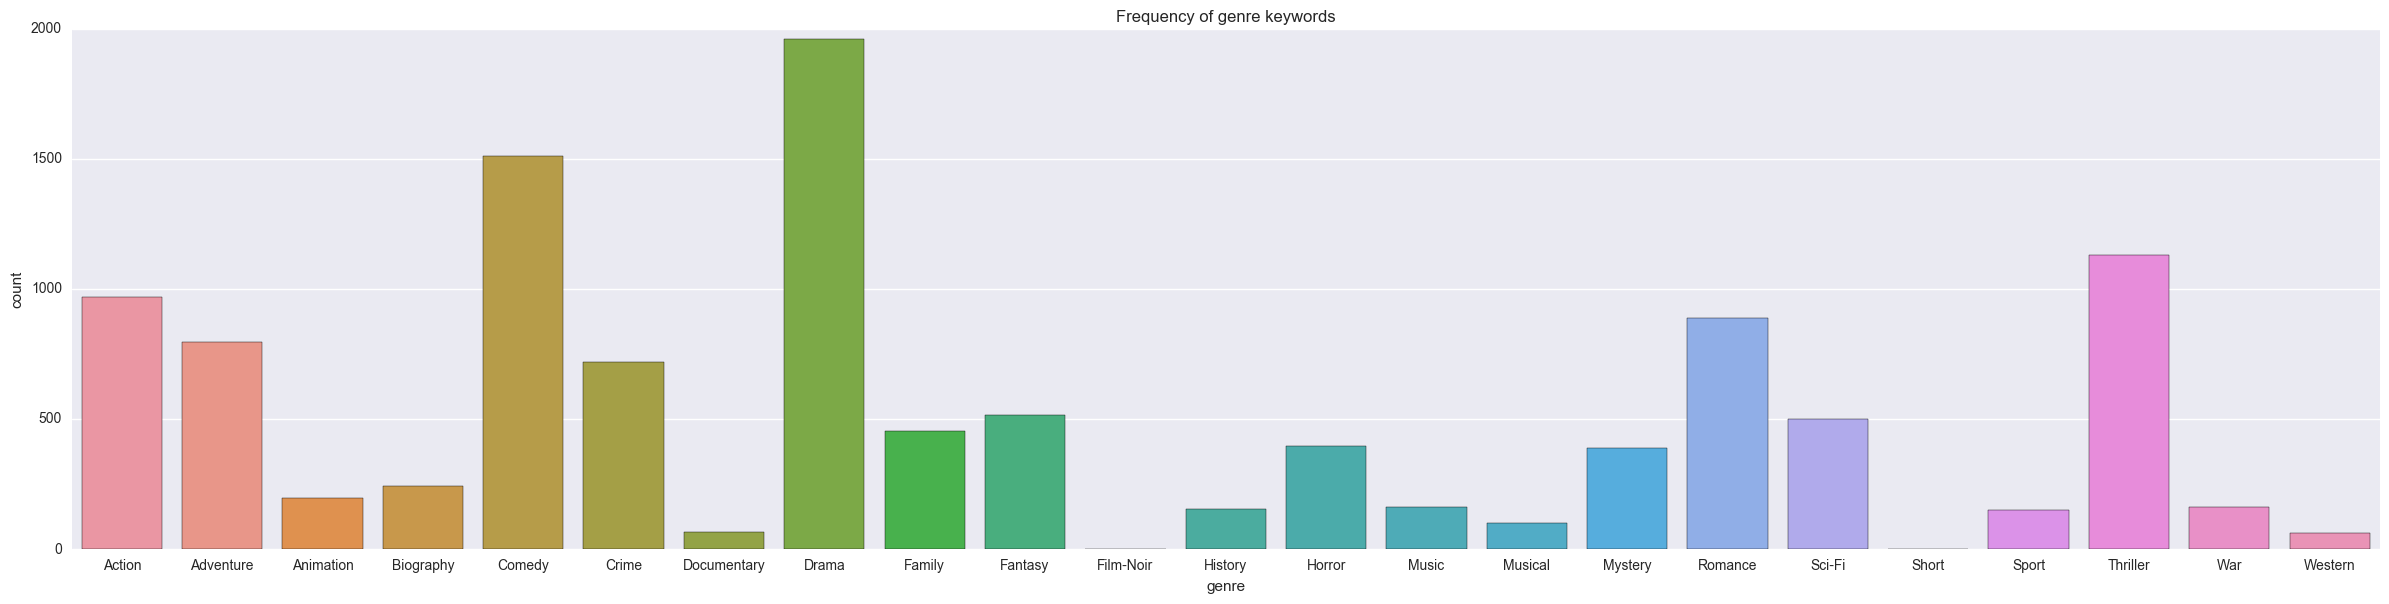

In [29]:
ax = sns.factorplot(x="genre", y="count", data = df_genre_count, kind="bar", size=6, aspect=4)
plt.title('Frequency of genre keywords')

In [30]:
df_genre_count.sort_values(by='count', ascending=False).head(5)

,count,genre
7,1961,Drama
4,1511,Comedy
20,1130,Thriller
0,970,Action
16,888,Romance


## Q. We will plot the box plot of the top 5 genre's to see how they are distributed


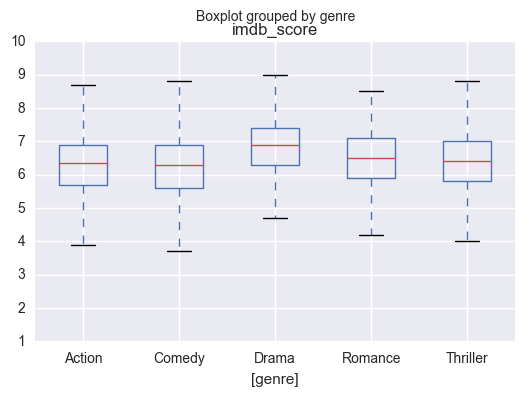

In [31]:
df_genre_box= df_genre[(df_genre['genre']=='Drama')|(df_genre['genre']=='Comedy')|(df_genre['genre']=='Thriller')
                         |(df_genre['genre']=='Action')|(df_genre['genre']=='Romance')]
df_genre_box= df_genre_box[['genre', 'imdb_score']]
from bokeh.charts import BoxPlot, output_file, show
df_genre_box.boxplot(by='genre')

# CONCLUSION: Out of the top 5 genre's Drama seems to have the highest imdb_score 

### ANALYSING THE TRENDS BETWEEN THESE5 GENRES

In [32]:
df_genre_top5= df_genre[(df_genre['genre']=='Drama')|(df_genre['genre']=='Comedy')|(df_genre['genre']=='Thriller')
                         |(df_genre['genre']=='Action')|(df_genre['genre']=='Romance')]

In [33]:
#df_genre_top5

In [34]:
df_sorting_genre_top5 = df_genre_top5.pivot_table(index='genre', columns='year', values='imdb_score', aggfunc='mean',fill_value=0)

In [35]:
df_sorting_genre_top5.head()

year,1920,1927,1929,1933,1935,1936,1939,1946,1947,1948,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.337037,6.504545,6.208108,6.221277,6.268750,6.432609,6.542857,6.345283,6.325000,6.397222
Comedy,0.0,0.0,0.0,7.7,7.8,8.6,0.0,0.0,0.0,7.1,...,6.234483,5.922535,6.091667,6.113699,6.163768,6.324194,6.408772,6.385417,6.367442,6.173077
Drama,4.8,8.3,0.0,0.0,0.0,8.6,8.2,7.5,7.7,0.0,...,6.939744,6.680851,6.636082,6.623171,6.659756,6.631944,6.862921,6.573494,6.801389,6.564000
Romance,0.0,0.0,6.3,7.7,7.8,0.0,8.2,7.5,0.0,7.1,...,6.532500,6.268750,6.366000,6.238776,6.476667,6.480645,6.830769,6.569565,6.329412,6.425000
Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,0.0,...,6.537778,6.230435,6.210638,6.442000,6.390385,6.415686,6.452941,6.209091,6.423810,6.600000


In [36]:
fin_df = df_sorting_genre_top5.T

In [37]:
top5 = ['Action', 'Comedy', 'Drama', 'Romance', 'Thriller']
all_df = []
for gen in top5:
    temp_df = fin_df[[gen]].reset_index()
    temp_df = temp_df[['year',gen]]
    temp_df = temp_df.rename(columns={gen:'imdb_score'})
    temp_df['genre_name'] = gen
    all_df.append(temp_df)
final_df = pd.concat(all_df)

In [38]:
final_df = final_df[final_df.imdb_score != 0]


In [39]:
final_df.head(1)

genre,year,imdb_score,genre_name
13,1954,8.7,Action


In [40]:
# final_df.plot(x='')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

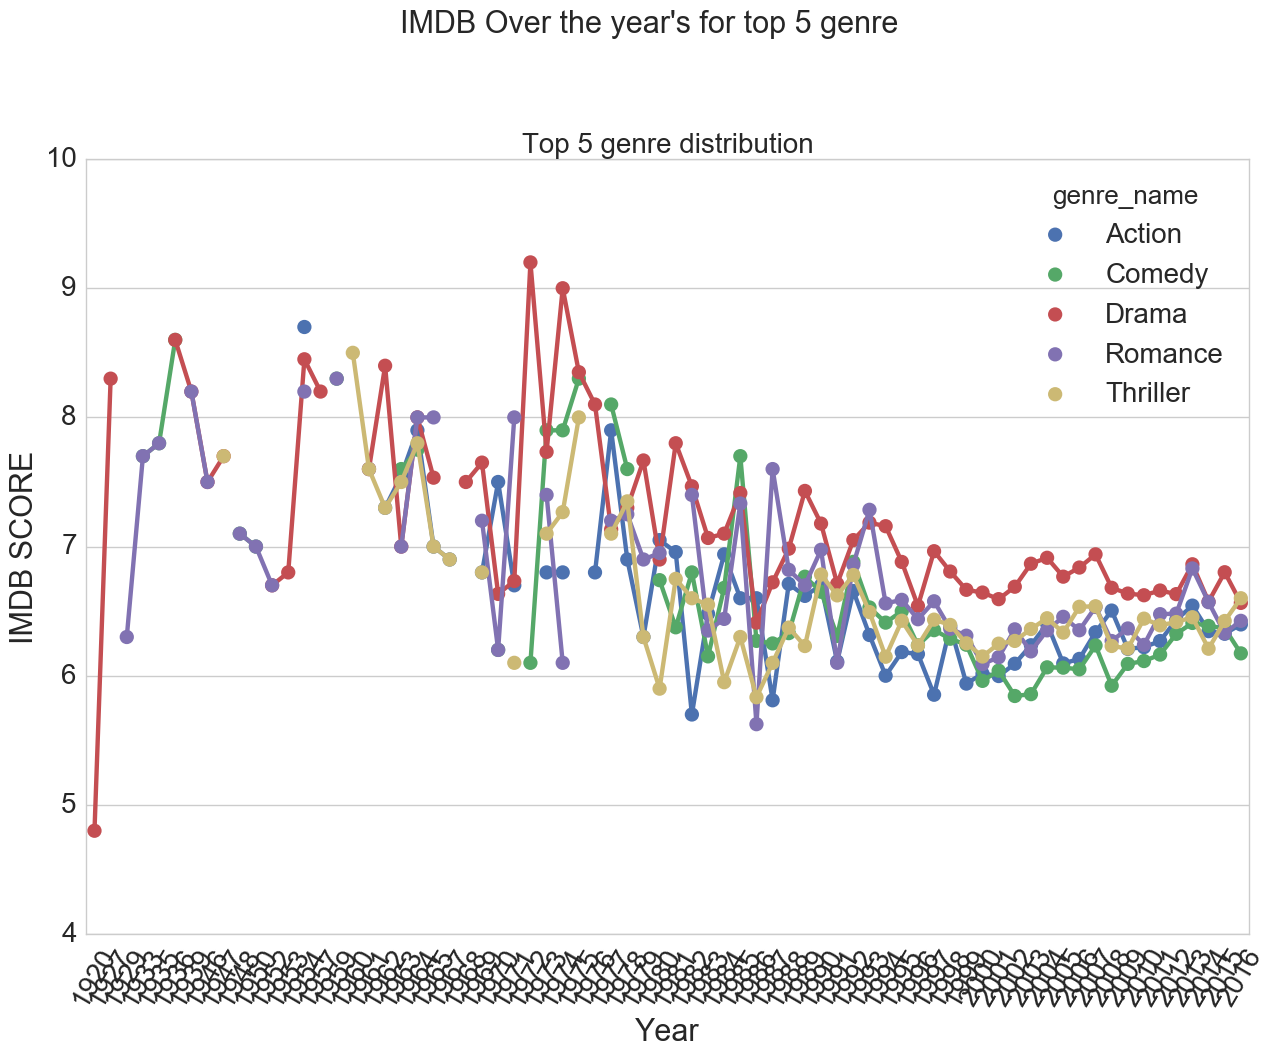

In [41]:

plt.figure(figsize=(15,10))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.pointplot(x="year", y="imdb_score", hue ="genre_name",size=(50,15) ,data=final_df)

plt.xlabel("Year")
plt.ylabel("IMDB SCORE")
plt.suptitle("IMDB Over the year's for top 5 genre", y=1.05, fontsize=22)
plt.title("Top 5 genre distribution", fontsize=20)
plt.xticks(rotation=60)


###
### 1. Thriller seems to be a consistent genre amongst all the years with it's peak being in between the years 1970 to 1980
### 2. Romance was at it's peak in 1940 in the earlier year's. It was at it's highest point in 1970's.
### 3. Drama was quite famous in the 1920 years and it also reached its peak in 1970's
### 4. Comedy also has it's fare share of high profit percentage throughout the year's reaching its peak in 1970's.